In [2]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

In [3]:
from traj_xai.src.xai import TrajectoryManipulator

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def plot_trajectory_by_point_pair_and_coef(segments, coef):
    # Normalize coefficients for color mapping
    normalized_coefs = np.abs(coef).flatten() / np.max(np.abs(coef))
    colors = plt.cm.RdYlGn_r(normalized_coefs)  # Red to Green reversed colormap

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(7, 7))

    # Plot each segment
    for i in range(len(segments)):
        # Convert Vector objects to numpy arrays
        temp = np.array([[p[0], p[1]] for p in segments[i]])  # Extract x, y from Vector

        if i < len(segments) - 1 and len(segments[i + 1]) > 0:
            next_point = np.array(
                [segments[i + 1][0][0], segments[i + 1][0][1]]
            ).reshape(1, 2)
            temp = np.concatenate((temp, next_point), axis=0)

        x_values = temp[:, 0]
        y_values = temp[:, 1]

        ax.plot(x_values, y_values, color=colors[i], linewidth=3)
        ax.scatter(x_values, y_values, c="blue", s=50)  # Add blue points

    # Add color bar
    sm = plt.cm.ScalarMappable(cmap="RdYlGn_r", norm=plt.Normalize(vmin=0, vmax=1))
    sm.set_array(normalized_coefs)
    fig.colorbar(sm, ax=ax, label="Normalized Importance")

    # Labels and title
    ax.set_title("Trajectory Explanation")
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.grid(True)
    ax.set_aspect("equal")
    plt.show()


def explain_and_visualize_sample(
    dataset, segment_func, perturbation_func, model, sample_idx=0
):
    traj_points, label = dataset.trajs[sample_idx].r, dataset.labels[sample_idx]

    if traj_points is None or len(traj_points) == 0:
        print(f"Trajectory {sample_idx} is empty or None.")
        return

    manipulator = TrajectoryManipulator(
        traj_points, segment_func, perturbation_func, model
    )

    coef = manipulator.explain()
    if coef is None:
        print("No meaningful explanation (coef is None).")
        return

    coef = np.array(coef)
    print(f"Explanation coefficients: {coef}")
    if coef.ndim > 1:
        coef = np.mean(coef, axis=0)

    segments = manipulator.get_segment()
    print(f"Segments: {segments}")

    plot_trajectory_by_point_pair_and_coef(segments, coef)

In [ ]:
# def explain_and_visualize_sample(
#     dataset, segment_func, perturbation_func, model, sample_idx=0
# ):
#     traj_points, label = dataset.trajs[sample_idx].r, dataset.labels[sample_idx]

#     if traj_points is None or len(traj_points) == 0:
#         print(f"Trajectory {sample_idx} is empty or None.")
#         return

#     manipulator = TrajectoryManipulator(
#         traj_points, segment_func, perturbation_func, model
#     )

#     coef = manipulator.explain()
#     if coef is None:
#         print("No meaningful explanation (coef is None).")
#         return

#     coef = np.array(coef)
#     print(f"Explanation coefficients: {coef}")
#     if coef.ndim > 1:
#         coef = np.mean(coef, axis=0)

#     segments = manipulator.get_segment()
#     print(f"Segments: {segments}")

#     plot_trajectory_by_point_pair_and_coef(segments, coef)

In [11]:
from traj_xai.src import (
    rdp_segmentation,
    gaussian_perturbation,
)
from pactus import Dataset, featurizers
from pactus.models import LSTMModel, RandomForestModel

In [17]:
dataset = Dataset.mnist_stroke()
train, test = dataset.split(0.8, random_state=42)
model = LSTMModel()
# Train the model on the train dataset
model.train(train, dataset, epochs=2, batch_size=64)
# Evaluate the model on a test dataset
evaluation = model.evaluate(test)

Epoch 1/2


/opt/homebrew/anaconda3/envs/traj_xai/lib/python3.10/site-packages/keras/src/layers/core/masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/homebrew/anaconda3/envs/traj_xai/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


875/875 ━━━━━━━━━━━━━━━━━━━━ 105s 118ms/step - accuracy: 0.5952 - loss: 1.2428
Epoch 2/2
  1/875 ━━━━━━━━━━━━━━━━━━━━ 1:43 119ms/step - accuracy: 0.9062 - loss: 0.3468

/opt/homebrew/anaconda3/envs/traj_xai/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


875/875 ━━━━━━━━━━━━━━━━━━━━ 103s 118ms/step - accuracy: 0.8831 - loss: 0.4003
438/438 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
No meaningful explanation (coef is None).
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
No meaningful explanation (coef is None).
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
No meaningful explanation (coef is None).
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Explanation coefficients: [[ 4.75524723 -2.03387475  0.9140452  -1.77072405 -3.87627653  0.89362123
   0.19439987 -0.57198979 -0.64339776  0.33327271 -0.30347132  0.59278766
   0.82649653 -0.59804992 -0.10152602 -0.26221163 -0.02556604  0.0643709
  -0.11538639]]
Segments: [[Vector([20.,  7.])], [Vector([19.,  8.])], [Vector([19.,  9.])], [Vector([18., 10.]), Vector([17., 11.])], [Vector([17., 12.])], [Vector([16., 13.])], [Vector([16., 14.])], [Vector([15., 14.])], [Vector([15., 15.])], [Vector([14., 16.])], [Vector([14., 17.])], [Vector([13., 17.])], [Vector([13., 18.]), Vector([13., 19.])], [Vector([12., 19.])], [Vector([12., 20.])], [Vector([11., 21.])], [Vector([11., 22.])], [Vector([10., 23.])], [Vec

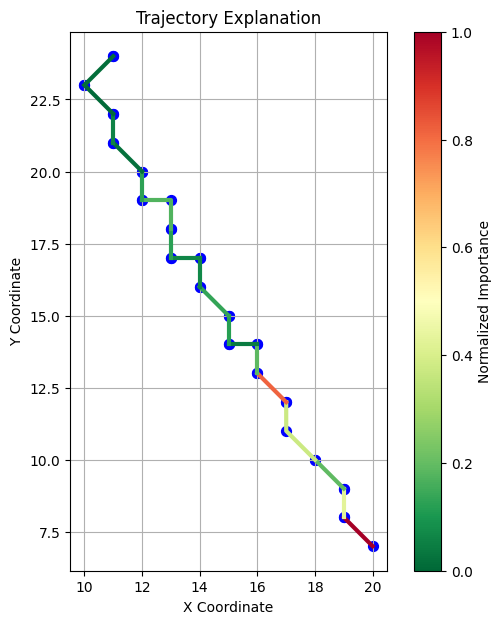

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
No meaningful explanation (coef is None).
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Explanation coefficients: [[ 0.59769401  1.42736881 -1.40869697 -1.30668533  1.16428316 -0.18199665
   0.33285756 -0.14386973 -0.02530789  0.34338083  0.15424275  0.67766662
   0.25923774  0.02225755 -0.36463721 -0.22070629  0.34241782  0.04728462
  -0.18918238  0.20104238  0.42443905 -0.31811676  0.45340135  0.38042227
   0.3935359  -0.06693551  0.26601051 -0.21126411  0.03185308 -0.07572049
  -0.53979188  0.26591268 -0.2219862   0.02813398 -0.0378768   0.23081378]
 [-0.22309059 -0.62592356  0.43537745  0.98185255 -1.37719708  0.51239043
   0.11279858  0.36579875 -0.03917849  0.21662774  0.53001917  0.04721403
   0.76911862 -0.09048774  0.05421308  0.4868045   0.55482429 -0.04819283
  -0.74740918 -0.31800952 -0.50755855  0.16735737  0.42303841  0.43035403
   0.852147    0.8062158   0.34042192 -0.31117434  0.20152421  0.0240558
   0.72487108 -0.23588022  0.16473637 

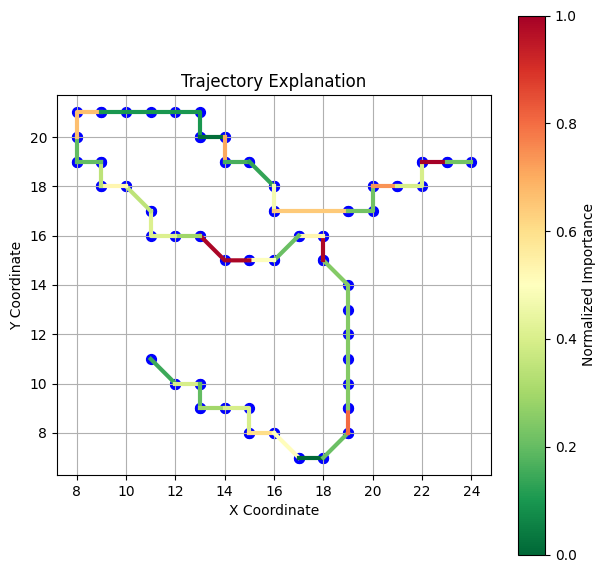

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Explanation coefficients: [[-0.55120803 -0.48408544 -0.67731926  0.44395908 -0.55723796  0.1248154
   0.45938198]]
Segments: [[Vector([14.,  6.])], [Vector([14.,  7.]), Vector([14.,  8.]), Vector([14.,  9.]), Vector([14., 10.]), Vector([14., 11.])], [Vector([15., 12.])], [Vector([15., 13.]), Vector([15., 14.]), Vector([15., 15.]), Vector([15., 16.]), Vector([15., 17.]), Vector([15., 18.])], [Vector([16., 19.])], [Vector([16., 20.]), Vector([16., 21.])], [Vector([17., 22.])]]


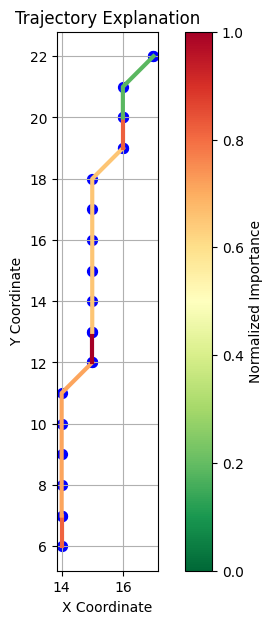

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Explanation coefficients: [[ 0.67542964 -0.25385606 -1.56490869  2.26395854  0.66011252 -1.94125016
   0.75585788  1.46263169 -0.12631908 -2.34752478 -0.07243728  1.41436564
  -2.11135337  1.60422319]]
Segments: [[Vector([12.,  8.])], [Vector([13.,  8.])], [Vector([14.,  7.])], [Vector([15.,  7.]), Vector([16.,  7.]), Vector([17.,  7.]), Vector([18.,  7.]), Vector([19.,  7.])], [Vector([20.,  8.])], [Vector([20.,  9.]), Vector([20., 10.]), Vector([20., 11.])], [Vector([19., 12.])], [Vector([19., 13.])], [Vector([18., 13.])], [Vector([18., 14.]), Vector([18., 15.]), Vector([18., 16.]), Vector([18., 17.]), Vector([18., 18.]), Vector([18., 19.]), Vector([18., 20.])], [Vector([17., 21.]), Vector([16., 22.]), Vector([15., 23.])], [Vector([14., 23.]), Vector([13., 23.]), Vector([12., 23.]), Vector([11., 23.]), Vector([10., 23.]), Vector([ 9., 23.]), Vector([ 8., 23.])], [Vector([12., 15.])], [Vector([13., 15.]), Vector([14., 15.]), Vector([15., 15.]), 

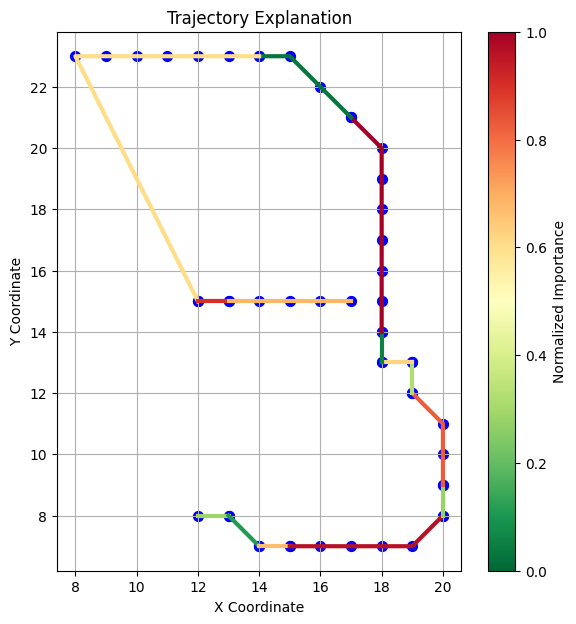

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Explanation coefficients: [[ 0.1707589  -0.2877749  -2.51524411  0.16963488  0.58393862 -0.1195247
   0.05066502]
 [-0.13583831 -0.22677738  0.13859453  0.17957638 -0.16452065 -0.21795029
   0.253107  ]
 [-0.47039119  0.79016709  0.55069059  0.82401365 -0.65977198  0.30837451
  -0.41740601]
 [ 0.4354706  -0.27561481  1.82595899 -1.1732249   0.240354    0.02910048
   0.11363399]]
Segments: [[Vector([15.,  7.])], [Vector([14.,  8.])], [Vector([14.,  9.]), Vector([14., 10.]), Vector([14., 11.]), Vector([14., 12.]), Vector([14., 13.]), Vector([14., 14.]), Vector([14., 15.])], [Vector([15., 16.])], [Vector([15., 17.]), Vector([15., 18.]), Vector([15., 19.])], [Vector([16., 20.])], [Vector([16., 21.]), Vector([16., 22.]), Vector([16., 23.]), Vector([16., 24.])]]


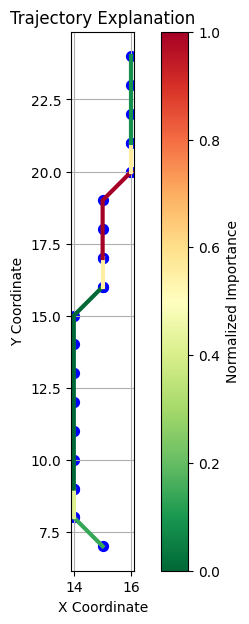

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
No meaningful explanation (coef is None).
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Explanation coefficients: [[ 0.1401514   0.97568778  0.29892068  0.91602997  1.04066152  0.69634785
  -1.14483393  0.19760395  1.07859379  0.28520395 -0.70195046 -0.52371155
  -0.02411015 -0.11093555 -0.6737382   0.64381445 -0.69454599]]
Segments: [[Vector([15., 14.])], [Vector([16., 13.])], [Vector([16., 12.]), Vector([16., 11.]), Vector([16., 10.]), Vector([16.,  9.]), Vector([16.,  8.])], [Vector([15.,  8.])], [Vector([17., 14.])], [Vector([17., 15.])], [Vector([18., 16.])], [Vector([18., 17.]), Vector([18., 18.])], [Vector([17., 19.])], [Vector([17., 20.])], [Vector([16., 21.])], [Vector([16., 22.])], [Vector([15., 22.])], [Vector([14., 23.])], [Vector([13., 23.]), Vector([12., 23.]), Vector([11., 23.])], [Vector([10., 22.])], [Vector([ 9., 22.])]]


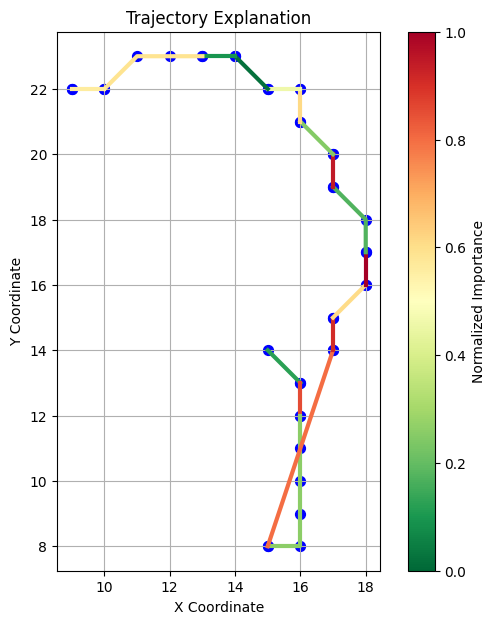

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Explanation coefficients: [[ 0.01021199  0.77652747  0.59642357  0.37741188 -0.23738975 -3.42233674
   1.31472228  1.85191264  0.2026971  -0.69467931 -0.19798152  0.59928222]
 [-0.9675551   0.21190444  0.22091219 -0.36995598 -0.088736    2.96015244
  -0.53890187 -2.85406005 -1.03537443  0.57235244  0.67683403 -0.46909564]
 [ 0.95734311 -0.9884319  -0.81733576 -0.0074559   0.32612575  0.46218431
  -0.77582041  1.00214742  0.83267733  0.12232687 -0.47885251 -0.13018658]]
Segments: [[Vector([ 9., 20.])], [Vector([10., 20.]), Vector([11., 20.]), Vector([12., 20.]), Vector([13., 20.])], [Vector([14., 19.])], [Vector([14., 18.]), Vector([14., 17.])], [Vector([13., 16.])], [Vector([13., 15.]), Vector([13., 14.])], [Vector([14., 13.])], [Vector([15., 13.])], [Vector([16., 12.]), Vector([17., 11.]), Vector([18., 10.])], [Vector([19., 10.]), Vector([20., 10.])], [Vector([21.,  9.])], [Vector([22.,  9.]), Vector([23.,  9.]), Vector([24.,  9.])]]


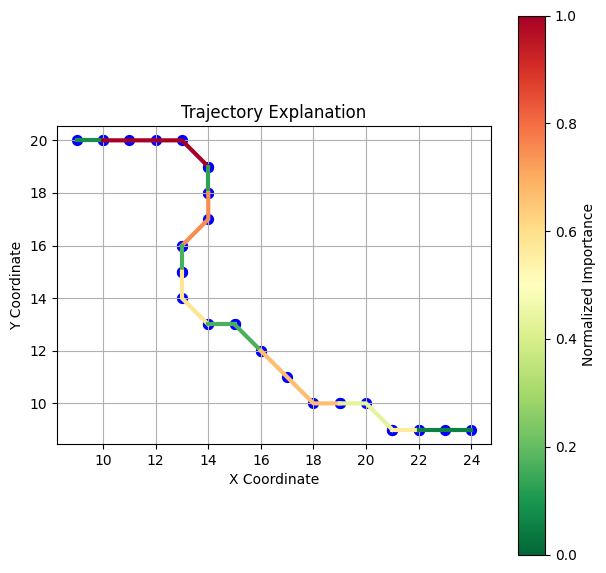

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
No meaningful explanation (coef is None).
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
No meaningful explanation (coef is None).
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
No meaningful explanation (coef is None).
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Explanation coefficients: [[ 0.23288889  0.45178499  0.06830339 -0.36961886  0.6061252  -0.40490622
   0.3546675   0.57579554  0.44591661  0.13172976 -0.3882457   0.47057892
  -0.46373627 -0.73994257 -0.16925481 -0.22586688 -0.00980989 -0.07856969
   0.92023702  0.52852912 -0.46482034 -0.06053639 -0.07263761]
 [-1.36940154  1.18717308  0.51351284  1.18816689  0.60898728 -0.15350912
   0.87863692  0.46418784 -0.290845   -0.49218291  0.37391325 -0.80534771
  -0.09260202  1.12786295  0.52809306  0.0193495  -0.18525675 -0.34350641
  -1.35981301  0.9263541  -0.4706969   0.14858682  0.08414944]
 [ 1.13651265 -1.63895807 -0.58181623 -0.81854803 -1.21511248  0.55841533
  -1.23330441 -1.03998339 -0.15507161  0.36045

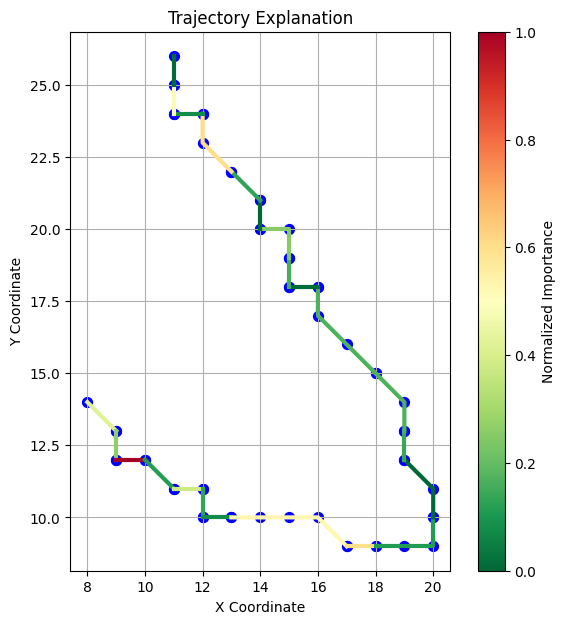

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


KeyboardInterrupt: 

In [74]:
for i in range(len(train.trajs)):
    if train.trajs[i].r is None or len(train.trajs[i].r) == 0:
        print(f"Trajectory {i} is empty or None.")
        continue
    # Giải thích và trực quan hóa mẫu đầu tiên
    explain_and_visualize_sample(
        dataset,
        segment_func=rdp_segmentation,
        perturbation_func=gaussian_perturbation,
        model=model,
        sample_idx=i,
    )